<a href="https://colab.research.google.com/github/ferjorosa/learn-fastai/blob/main/pet_breeds_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide (Google Colab)
!pip install fastai --upgrade -q
import fastai
print(fastai.__version__)

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 189 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 2.2 MB/s 
2.5.3
     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 51 kB 281 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Data

In [3]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_117.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_17.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_119.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_198.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_15.jpg')...]

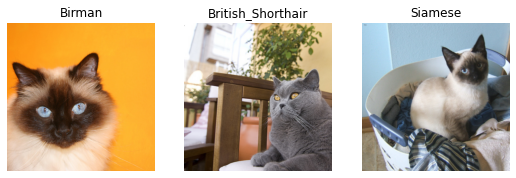

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'), 
                 item_tfms=Resize(335))
#pets.summary(path/"images")
dls = pets.dataloaders(path/"images")
# pets1.summary(path/"images")
dls.show_batch(nrows=1, ncols=3)

## Model

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.497578,0.286180,0.090663,03:34


epoch,train_loss,valid_loss,error_rate,time
0,0.411298,0.256512,0.084574,04:57
1,0.205842,0.185658,0.061570,04:57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TensorCategory(27, device='cuda:0')


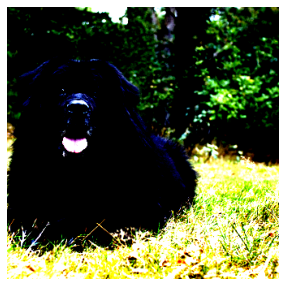

In [7]:
x,y = dls.one_batch()
show_image(x[0])
print(y[0])